<a href="https://colab.research.google.com/github/rmoutarde/NLP_project/blob/main/NLP_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project - Fake News Detection - Quentin MASCART & Raphaëlle VILLERS


## Objective : 

## The data :

## Project structure 

### 1. Preprocessing

### 2. 

### 3. 

### ...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preparation

Data can be manually downloaded here : https://www.kaggle.com/anmolkumar/fake-news-content-detection?fbclid=IwAR3a9gh9NHxedo3bNkTzErZpX12nk9lvjej1f608TzCcehfp2iIUmVH5pFc

In [ ]:
! wget https://raw.githubusercontent.com/rmoutarde/NLP_project/main/train.csv

--2021-03-20 15:14:05--  https://raw.githubusercontent.com/rmoutarde/NLP_project/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1398534 (1.3M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.33M  --.-KB/s    in 0.09s   

2021-03-20 15:14:06 (14.3 MB/s) - ‘train.csv’ saved [1398534/1398534]



In [ ]:
df_news = pd.read_csv("train.csv")
df_news.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


In [ ]:
Fake=df_news[df_news.Labels==5].Text
Fake

5        The Chicago Bears have had more starting quart...
16       McCain opposed a requirement that the governme...
30                Says Paul Ryan is still endorsing Trump.
35       We have a federal government that thinks they ...
36       Austin is a city that has basically doubled in...
                               ...                        
10200    During the Bush administration, you actually h...
10205    Nearly half of Hispanic voters in Arizona's la...
10210    Since the Affordable Care Act passed, 90 perce...
10211    Debt has almost doubled in Austin under Gov. P...
10222    For the first time since the Korean War, total...
Name: Text, Length: 1676, dtype: object

Lables correspond to the following categorization :
* Barely-True - 0
* False – 1
* Half-True – 2
* Mostly-True - 3
* Not-Known - 4
* True - 5


In [ ]:
df_news.Labels.value_counts()  

2    2114
1    1995
3    1962
5    1676
0    1654
4     839
Name: Labels, dtype: int64

Text(0, 0.5, 'Value counts')

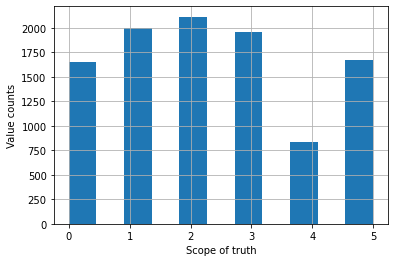

In [ ]:
df_news.Labels.hist(bins = 11)
plt.xlabel("Scope of truth")
plt.ylabel("Value counts")

### Text_tag

In [ ]:
# Processing the Text_tag column : split into list of words to categorize
# We want to split according to the commas

from functools import reduce
from operator import add

# List of words with separator = ","
arr = df_news.Text_Tag.apply(lambda x: str(x).split(',')).array

arr = reduce(add, arr)
print("number of words =", len(arr))
print("nb of different words =", len(set(arr)))


number of words = 22205
nb of different words = 143


### Text

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer

In [ ]:
# Intuition : maybe Fake news use less vocabulary than True news

tknr = TweetTokenizer()
for label in range(6):
  arr = df_news[df_news.Labels == label].Text.apply(lambda x: tknr.tokenize(x)).array
  arr = reduce(add, arr)
  # the set object transforms a list to the set of unique elements in the list :
  print("For label {0}, set of different words with tokenizer {1} is {2} :".format(label, tknr, len(set(arr))))

For label 0, set of different words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c197a310> is 5796 :
For label 1, set of different words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c197a310> is 6239 :
For label 2, set of different words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c197a310> is 6454 :
For label 3, set of different words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c197a310> is 6116 :
For label 4, set of different words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c197a310> is 3971 :
For label 5, set of different words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c197a310> is 5596 :


Remember 0 is Barely True and 5 is True.
We normalize by total amount of words, or by text count in each category to get a clearer idea.

In [ ]:
# Normalizing by number of words in each label category

tknr = TweetTokenizer()
for label in range(6):
  arr = df_news[df_news.Labels == label].Text.apply(lambda x: tknr.tokenize(x)).array
  arr = reduce(add, arr)
  # the set object transforms a list to the set of unique elements in the list :
  print("For label {0}, set of different words over number of words with tokenizer {1} is {2} :".
        format(label, tknr, len(set(arr))/len(arr)))


For label 0, set of different words over number of words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c0c07090> is 0.17048061650685334 :
For label 1, set of different words over number of words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c0c07090> is 0.16274944567627495 :
For label 2, set of different words over number of words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c0c07090> is 0.14390831252229755 :
For label 3, set of different words over number of words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c0c07090> is 0.1493820526598603 :
For label 4, set of different words over number of words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c0c07090> is 0.24314229733039433 :
For label 5, set of different words over number of words with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c0c07090> is 0.16401899290696992 :


In [ ]:
df_news[df_news.Labels == 1].Text.count()

1995

In [ ]:
# Normalizing by text count in each label category

tknr = TweetTokenizer()
for label in range(6):
  arr = df_news[df_news.Labels == label].Text.apply(lambda x: tknr.tokenize(x)).array
  arr = reduce(add, arr)
  text_count = df_news[df_news.Labels == label].Text.count()
  # the set object transforms a list to the set of unique elements in the list :
  print("For label {0}, set of different words over text count with tokenizer {1} is {2} :".
        format(label, tknr, len(set(arr))/text_count))


For label 0, set of different words over text count with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c8bf8350> is 3.5042321644498187 :
For label 1, set of different words over text count with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c8bf8350> is 3.1273182957393484 :
For label 2, set of different words over text count with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c8bf8350> is 3.052980132450331 :
For label 3, set of different words over text count with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c8bf8350> is 3.1172273190621813 :
For label 4, set of different words over text count with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c8bf8350> is 4.733015494636472 :
For label 5, set of different words over text count with tokenizer <nltk.tokenize.casual.TweetTokenizer object at 0x7f61c8bf8350> is 3.3389021479713605 :


I don't think we can conclude... 

Another assumption : maybe there are more numbers in True news ? 

In [ ]:
import re
# Regular expression that matches any sequence of numbers:
nb =  '[0-9]+' # retrieve all numbers : ([0-9] == from 0 to 9, and + allows multiple matches)

In [ ]:
# Regular expression that matches any sequence of numbers:
#ints, floats, percents, years

# compile : Compile a regular expression pattern into a regular expression object,
# which can be used for matching using its match(), search() and other methods
ints_prog = re.compile('[0-9]+')
floats_prog = re.compile('[0-9]+\.?[0-9]*') # \. pour désigner le point, * pour répétitions zero ou plusieurs fois
percents_prog = re.compile('[0-9]+\.?[0-9]*%')

years_prog = re.compile('[12][089][0-9][0-9]') # a year between 1800 and 2099

# Compute number of matches for every abstract
progs = [ints_prog, floats_prog, percents_prog, years_prog]
nb_types = ["ints", "floats", "percents", "years"]

df_nb = df_news  # Don't forget to compute over unique abstracts


In [ ]:
for prog, nb_type in zip(progs, nb_types) :
  #Create 1 column per type
  #Split string by the occurrences of pattern => splits - 1 gives number of occurences
  df_nb[nb_type] = pd.DataFrame(df_nb['Text'].apply(lambda x: len(prog.split(x))-1).array)
df_nb[nb_types].head()

,ints,floats,percents,years
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
print(df_nb.ints.sum())
print(df_nb.floats.sum())
print(df_nb.percents.sum())
print(df_nb.years.sum())

7317
6951
110
915


In [ ]:
df_nb['numbers'] = df_nb.ints +df_nb.floats + df_nb.percents + df_nb.years 


In [ ]:
for label in range(6):
  nb_count = df_nb[df_nb.Labels == label].numbers.sum()
  text_count = df_news[df_news.Labels == label].Text.count()
  # the set object transforms a list to the set of unique elements in the list :
  print("For label {0}, there are {1} numbers over {2} texts, ratio is {3}".
        format(label, nb_count, text_count, nb_count/text_count))


For label 0, there are 2250 numbers over 1654 texts, ratio is 1.3603385731559854
For label 1, there are 2410 numbers over 1995 texts, ratio is 1.2080200501253133
For label 2, there are 3544 numbers over 2114 texts, ratio is 1.6764427625354779
For label 3, there are 3600 numbers over 1962 texts, ratio is 1.834862385321101
For label 4, there are 814 numbers over 839 texts, ratio is 0.9702026221692491
For label 5, there are 2675 numbers over 1676 texts, ratio is 1.5960620525059666


To be explored further to check whether it is significant but there might be something there !


#### Classic NLP Pipeline[texte du lien](https://)

##### Tokenization using spacy

In [ ]:
#---------- Tokenization using spacy -----------#

from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

sentence = nlp(df_news.Text[29]) 
for word in sentence:
    print(word.text)
print(len(sentence))


Youth
unemployment
in
minority
communities
is
about
40
to
45
percent
.
12


In [ ]:
tokenizer = Tokenizer(nlp.vocab)
arr_spacy = df_news.Text.apply(lambda x : [w.text for w in tokenizer(x)]).array
arr_spacy = reduce(add, arr_spacy)

print("Total nb of words with Spacy {0} and Vocabulary size {1}".format(len(arr_spacy), len(set(arr_spacy))))


Total nb of words with Spacy 184842 and Vocabulary size 21682


In [ ]:
# Inspecting a tokenization sample
tokenization_sample = df_news.Text.head().apply(lambda x: 
                                              [w.text for w in tokenizer(x)])
print("Tokenization sample:\n {}".format(tokenization_sample))


Tokenization sample:
 0    [Says, the, Annies, List, political, group, su...
1    [When, did, the, decline, of, coal, start?, It...
2    [Hillary, Clinton, agrees, with, John, McCain,...
3    [Health, care, reform, legislation, is, likely...
4    [The, economic, turnaround, started, at, the, ...
Name: Text, dtype: object


##### Lemmatize using Spacy

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

#from spacy.lemmatizer import Lemmatize
from spacy.lang.en import English
lemmatizer = English.Defaults.create_lemmatizer()
#from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES

# Instanciating lemmatizer
#lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
lemmatizer = nlp.Defaults.create_lemmatizer()
print('loaded')
# Usage: lemmatizer(token, POS(token))
# But we will rather use spacy's nlp engine

# Counting lemmas vocabulary count

# Usage: lemmatizer(token, POS(token))
# But we will rather use spacy's nlp engine

pipeline = [Lemmatizer]

tokenizer = Tokenizer(nlp.vocab)
arr_lemmatizer = df_news.Text.apply(lambda x : [w.lemma_ for w in nlp(x)]).array
arr_lemmatizer = reduce(add, arr_lemmatizer)

print("Total nb of words with Lemmatizer {0} and Vocabulary size {1}".format(len(arr_lemmatizer), len(set(arr_lemmatizer))))


# Inspecting a tokenization sample
lemmatizer_sample = df_news.Text.head().apply(lambda x: 
                                              [w.lemma_ for w in nlp(x)])
print("Tokenization sample:\n {}".format(lemmatizer_sample))


loaded


### Is there any relationship between the categories in Text_tag and the length of text ? The truth of text ? The proportion of numbers quoted in text ? 

In [ ]:
# We might want to detect quotes and numbers (percentage, years...)